In [18]:
# Test the display library

# force libraries to re-load every time - helpful during development
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import sys
sys.path.append('../lib')

In [20]:
from metrowestcar_file_io import FileReader

from os import getcwd
from os.path import abspath
from os.path import join
from os.path import exists

In [21]:
# creating a FileReader
file_reader = FileReader(90, 180, 3)

In [35]:
dirpath = join(abspath(getcwd()), "..\\data_geneostrat\\TrainingData")


# list of all steerings

tracklist = [

    "121",
    "122",
    "124",
    "125",
    "R18CCW",
    "R18CCW_V",
    "R18CW",
    "R18CW_V",
    "R20CCW",
    "R20CCW_V",
    "R20CW",
    "R20CW_V",
    "R21CCW",
    "R21CCW_V",
    "R21CW",
    "R21CW_V",
    "R25CCW",
    "R25CCW_V",
    "R25CW",
    "R25CW_V",
    "STR1",
    "STR1_V",
    "STR2",
    "STR2_V",
]



#tracklist = [
#  
#    "121",
#    "122",
#    "124",
#    "125",
# 
#]



    

121_0.txt
Track 121
# images = 1230
min =  325
max =  493
mean = 411.66504065
var n = 566.730078657
std  = 23.8060933094


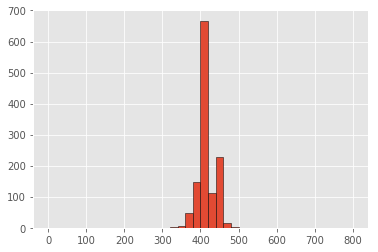

continue(y/n)y
122_0.txt
Track 122
# images = 1207
min =  273
max =  454
mean = 373.322286661
var n = 863.656694688
std  = 29.3880365912


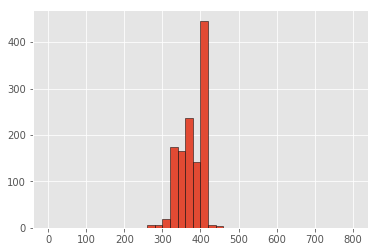

continue(y/n)y
124_0.txt
Track 124
# images = 1486
min =  294
max =  528
mean = 405.146702557
var n = 704.65950124
std  = 26.5454233577


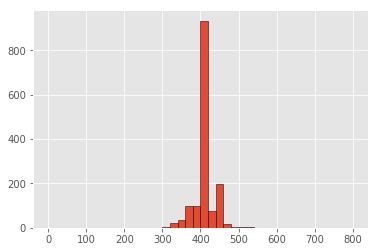

continue(y/n)y
125_0.txt
Track 125
# images = 974
min =  282
max =  472
mean = 378.830595483
var n = 838.329618331
std  = 28.9539223307


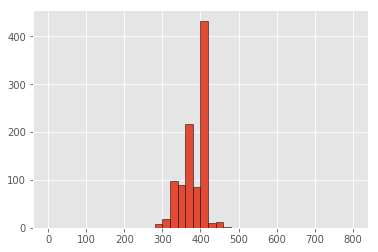

continue(y/n)y
R18CCW_0.txt
Track R18CCW
# images = 369
min =  273
max =  401
mean = 338.547425474
var n = 953.543143778
std  = 30.8794939042


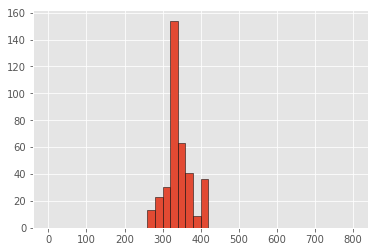

continue(y/n)y
R18CCW_V_0.txt
Track R18CCW_V
# images = 644
min =  273
max =  410
mean = 337.448757764
var n = 491.135572991
std  = 22.1615787567


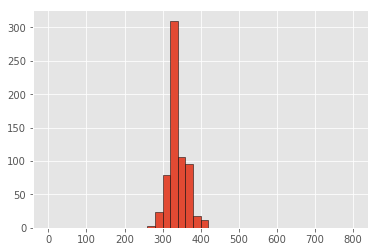

continue(y/n)y
R18CW_0.txt
Track R18CW
# images = 381
min =  400
max =  520
mean = 443.165354331
var n = 737.754810176
std  = 27.1616422585


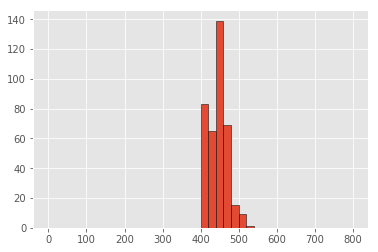

continue(y/n)y
R18CW_V_0.txt
Track R18CW_V
# images = 475
min =  400
max =  527
mean = 440.315789474
var n = 503.159224377
std  = 22.4312109432


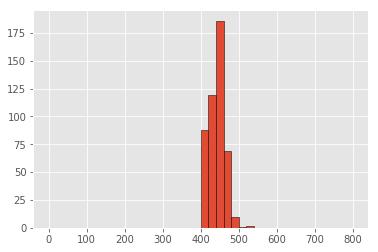

continue(y/n)y
R20CCW_0.txt
Track R20CCW
# images = 933
min =  300
max =  401
mean = 347.663451233
var n = 316.491236535
std  = 17.790200576


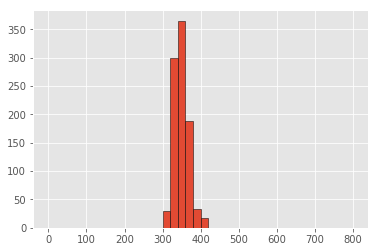

continue(y/n)y
R20CCW_V_0.txt
Track R20CCW_V
# images = 909
min =  273
max =  410
mean = 345.708470847
var n = 331.924911743
std  = 18.21880654


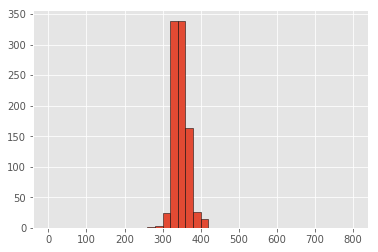

continue(y/n)y
R20CW_0.txt
Track R20CW
# images = 725
min =  400
max =  478
mean = 433.955862069
var n = 257.178741498
std  = 16.0367933671


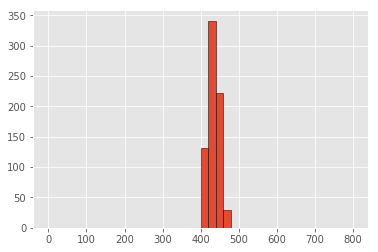

continue(y/n)y
R20CW_V_0.txt
Track R20CW_V
# images = 734
min =  400
max =  487
mean = 434.09400545
var n = 385.10696679
std  = 19.6241424473


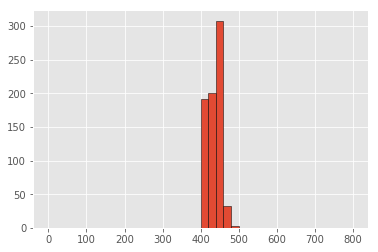

continue(y/n)y
R21CCW_0.txt
Track R21CCW
# images = 816
min =  296
max =  410
mean = 349.512254902
var n = 374.004751778
std  = 19.3392024597


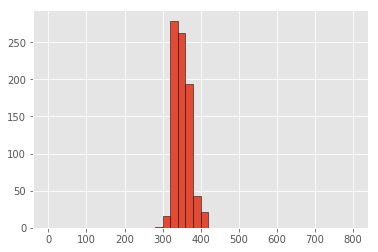

continue(y/n)y
R21CCW_V_0.txt
Track R21CCW_V
# images = 840
min =  296
max =  440
mean = 354.095238095
var n = 515.021882086
std  = 22.6940935507


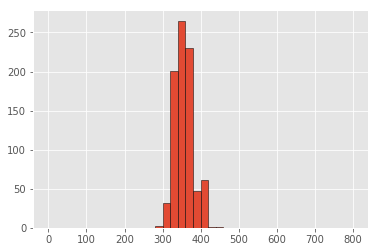

continue(y/n)y
R21CW_0.txt
Track R21CW
# images = 641
min =  400
max =  478
mean = 425.16224649
var n = 411.346530991
std  = 20.2816796886


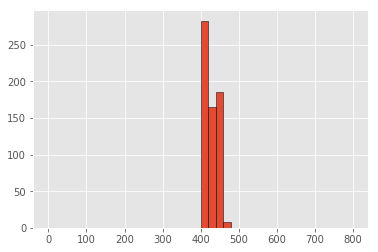

continue(y/n)y
R21CW_V_0.txt
Track R21CW_V
# images = 691
min =  375
max =  528
mean = 427.600578871
var n = 449.710216742
std  = 21.2063720787


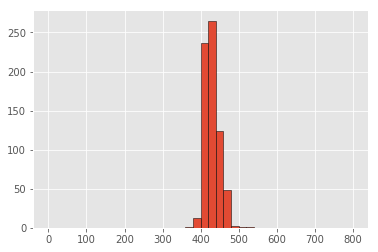

continue(y/n)y
R25CCW_0.txt
Track R25CCW
# images = 815
min =  283
max =  410
mean = 359.295705521
var n = 305.562864993
std  = 17.4803565465


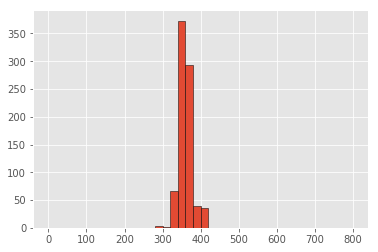

continue(y/n)y
R25CCW_V_0.txt
Track R25CCW_V
# images = 1022
min =  322
max =  410
mean = 359.490215264
var n = 322.036597018
std  = 17.945378152


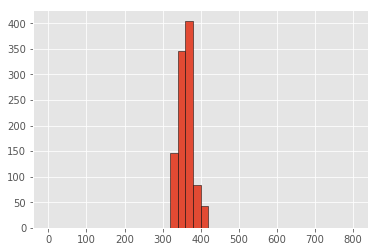

continue(y/n)y
R25CW_0.txt
Track R25CW
# images = 684
min =  400
max =  477
mean = 422.578947368
var n = 252.770083102
std  = 15.8987447021


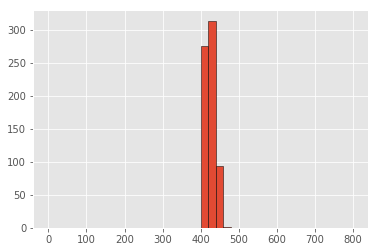

continue(y/n)y
R25CW_V_0.txt
Track R25CW_V
# images = 919
min =  366
max =  458
mean = 418.68226333
var n = 344.299478664
std  = 18.5553086383


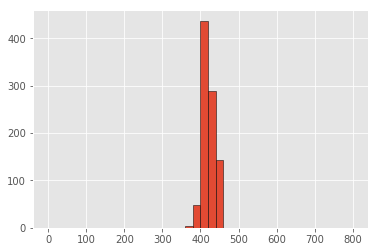

continue(y/n)y
STR1_0.txt
Track STR1
# images = 657
min =  335
max =  465
mean = 399.191780822
var n = 120.556827422
std  = 10.9798373131


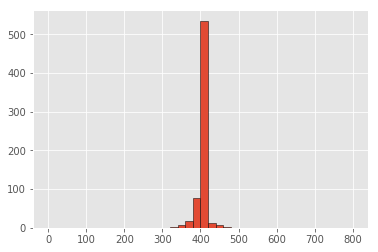

continue(y/n)y
STR1_V_0.txt
Track STR1_V
# images = 585
min =  338
max =  448
mean = 399.153846154
var n = 127.52504931
std  = 11.2926989382


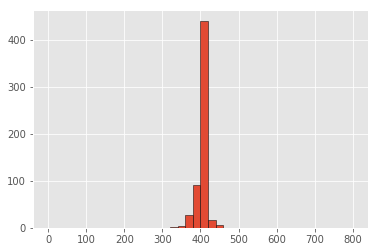

continue(y/n)y
STR2_0.txt
Track STR2
# images = 590
min =  295
max =  446
mean = 398.920338983
var n = 129.029247343
std  = 11.3591041611


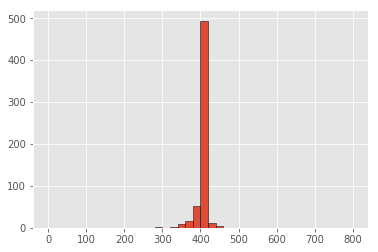

continue(y/n)y
STR2_V_0.txt
Track STR2_V
# images = 595
min =  349
max =  448
mean = 399.154621849
var n = 74.5273525881
std  = 8.63292259829


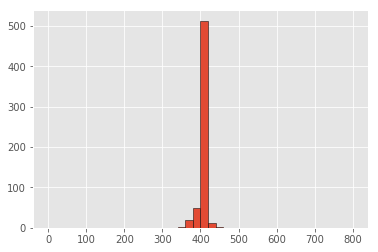

continue(y/n)y
done


In [36]:


# investigate each track a little bit
# reference  http://benalexkeen.com/comparative-statistics-in-python-using-scipy/

import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

for track in tracklist:
    data = file_reader.read_steerings_from_directory(dirpath, track)
    print("Track " + track + " #images=" + str(data.shape[0]) + " mean=" + str(np.mean(data)))
    #print("min =  " + str(np.min(data)))
    #print("max =  " + str(np.max(data)))
    print("var n = " + str(np.var(data)))
    print("std  = " + str(np.std(data)))

    plt.hist(data, bins=40, range=(0,800), edgecolor='black')
    plt.show()
    
    text = input("continue(y/n)")
    if (text != "y"):
        break

print("done")


